<a href="https://colab.research.google.com/github/myngoc-trg/BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy.stats

#the datasets
import sklearn.datasets
import sklearn.cluster

#For better statistical plotting
import seaborn as sns

%matplotlib inline

# Using SVD and PCA to reduce dimensions

We will use the iris dataset that is included in the sklearn package and convert the basic data in it to a dataframe

In [2]:
iris = sklearn.datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

## Task

 * investigate what iris contains by reading print(iris['DESCR'])
 * and investigate the structure of the data in the dataframe with describe() and by looking at the head of the DataFrame
 * Use the "pairplot" from seaborn to investigate the relation between the data, can you by eye discover correlation between the different type of data?

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
df_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [5]:
df_iris.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

Singular value decomposition factorizes matrix <br>
$X \in mxn$ <br> into <br> $X = U \, * \, \sum \, * \, V^T$ <br>
Where:

* $U \in m×m$ that is called the left singular vectors where each columns is a orthonormal eigenvectors of $XX^T$
* the diagonal matrix  Σ with entries single entries $\in  \mathbb{R}$ that are the non-negative singular values of  X
* and the right singular vectors in Matrix $V \in n×n$ where the columns are the set of orthonormal eigenvectors of  $X^TX$


The SVD algorithm from the numpy package can calculate this quite efficiently

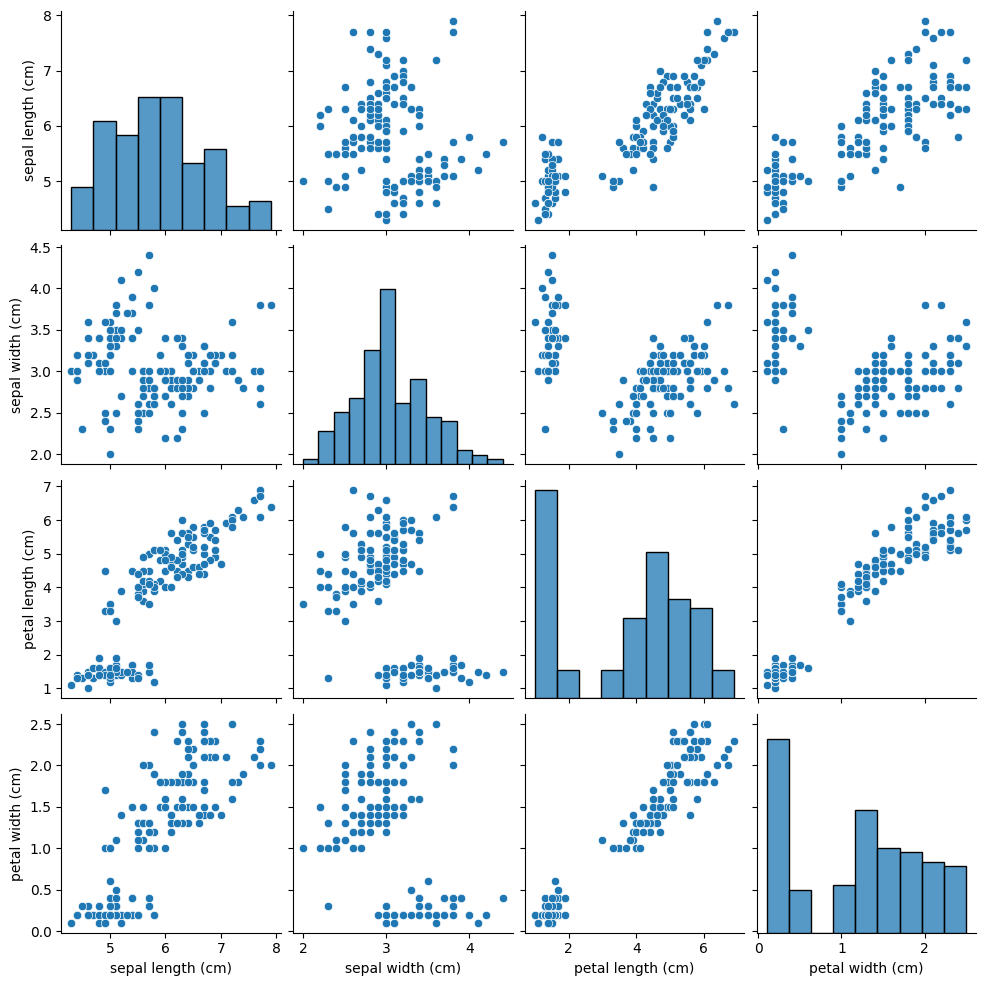

In [6]:
sns.pairplot(df_iris)

In [7]:
U_iris, S_iris, Vt_iris = np.linalg.svd(df_iris, full_matrices=False)
Vt_iris.shape

(4, 4)

## Task
Plot the cummulative sum of the entries in $S_{iris}^2$ divided by the sum of $S_{iris}^2$ and use the equations 12.8 and 12.9 in the book to label the axis. what is the sum of $S_{iris}^2$? use the answer to label the points in legend of this plot.

In [8]:
S_iris_squared = S_iris**2
cumulative_sum_S_squared = np.cumsum(S_iris_squared)
total_sum_S_squared = np.sum(S_iris_squared)
cumulative_variance_ratio = cumulative_sum_S_squared / total_sum_S_squared


The cumulative sum of S_iris^2 is: [9208.30507031 9523.75938689 9535.7374298  9539.29      ]
The total sum of S_iris^2 is: 9539.289999999997
The cumulative variance ratio is: [0.96530298 0.99837193 0.99962759 1.        ]


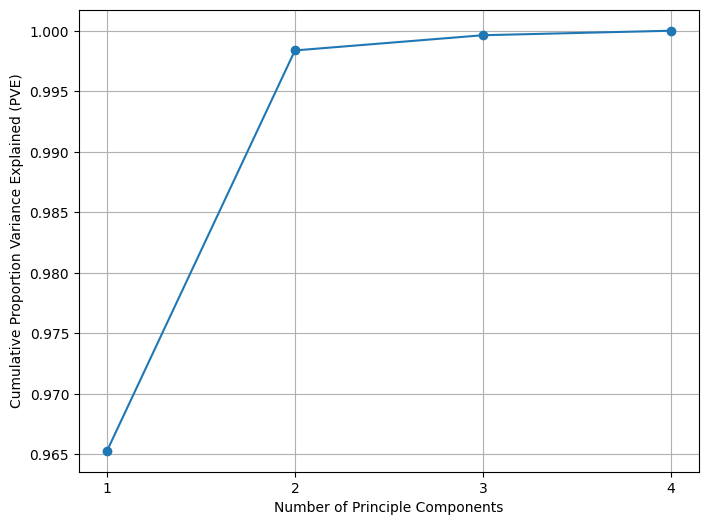

In [9]:
S_iris_squared = S_iris**2
cumulative_sum_S_squared = np.cumsum(S_iris_squared)
total_sum_S_squared = np.sum(S_iris_squared)
cumulative_variance_ratio = cumulative_sum_S_squared / total_sum_S_squared

print(f"The cumulative sum of S_iris^2 is: {cumulative_sum_S_squared}")
print(f"The total sum of S_iris^2 is: {total_sum_S_squared}")
print(f"The cumulative variance ratio is: {cumulative_variance_ratio}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
#plt.title('')
plt.xlabel('Number of Principle Components')
plt.ylabel('Cumulative Proportion Variance Explained (PVE)')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.grid(True)
plt.show()

## Task
Label the axis in the following plot. It seems as the SVD has selected a vector in which the data is well separated. Try the other vectors and see if you can find other vectors that separate the different flowers.

Text(0, 0.5, 'sepal width (cm)')

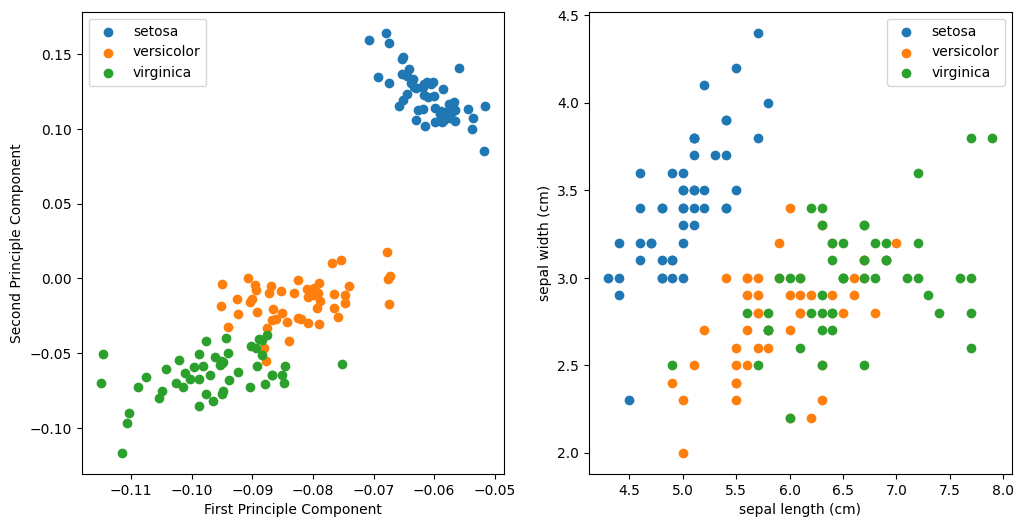

In [10]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
selector=iris['target']

for i in np.unique(selector):
    selector_name=iris['target_names'][i]
    ax[0].scatter(U_iris[selector==i,0],U_iris[selector==i,1],label=selector_name)
    ax[1].scatter(df_iris.iloc[selector==i,0],df_iris.iloc[selector==i,1],label=selector_name)
[ax[a].legend() for a in range(2)]
ax[0].set_xlabel('First Principle Component')
ax[0].set_ylabel('Second Principle Component')
ax[1].set_xlabel(df_iris.columns[0])
ax[1].set_ylabel(df_iris.columns[1])


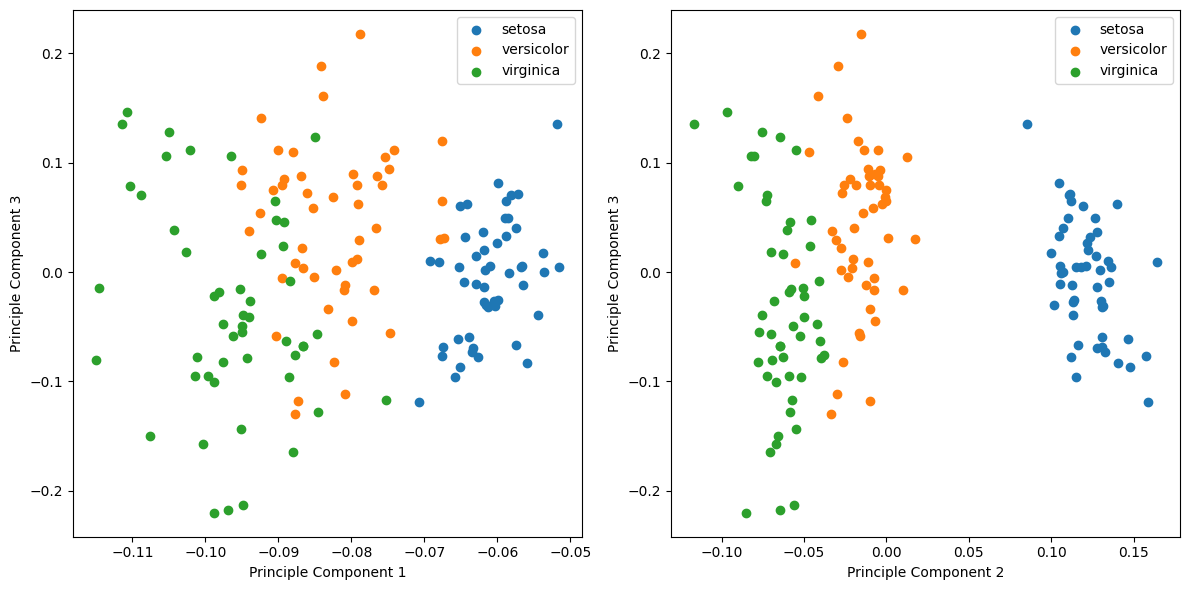

In [11]:
# Try the other vectors and see if you can find other vectors that separate the different flowers.
pc_pairs = ((0,2), (1,2))
fig, ax = plt.subplots(1, len(pc_pairs), figsize=(12, 6))

for ax, (pcx,pcy) in zip(ax, pc_pairs):
    for i, name in enumerate(iris['target_names']):
      ax.scatter(U_iris[selector==i,pcx], U_iris[selector==i,pcy], label=name)
    ax.set_xlabel(f'Principle Component {pcx+1}')
    ax.set_ylabel(f'Principle Component {pcy+1}')
    ax.legend()

plt.tight_layout()

### Illustration of SVD
To better understand the effect of SVD we will look at a simplified dataset and normalize the data.
Then we will simplify and illustrate the calculation of the projection onto the axis we will rotate the axis system and use the y-value as perpendicular projection $z_i$ in formula 12.5 or figure 12.2 in the book.

## Task

* create a new DataFrame with the petal length and width that only contains the varieties 'versicolor' and 'virginica'
* centralize each of the axis (subtract the mean) and normalize the scale (divide by the variance)
* make a scatterplot between the normalized petal length and width.matrix}



In [12]:
# Filter the DataFrame to include only 'versicolor' and 'virginica'
versicolor_virginica_indices = (iris.target == iris.target_names.tolist().index('versicolor')) | \
                               (iris.target == iris.target_names.tolist().index('virginica'))
df_petal = df_iris.loc[versicolor_virginica_indices, ['petal length (cm)', 'petal width (cm)']]

# Centralize and normalize the data
df_petal_scaled = (df_petal - df_petal.mean()) / df_petal.std()

display(df_petal_scaled.head())

petal length (cm)  petal width (cm)
50          -0.249522         -0.649766
51          -0.491776         -0.414343
52          -0.007268         -0.414343
53          -1.097412         -0.885188
54          -0.370649         -0.414343

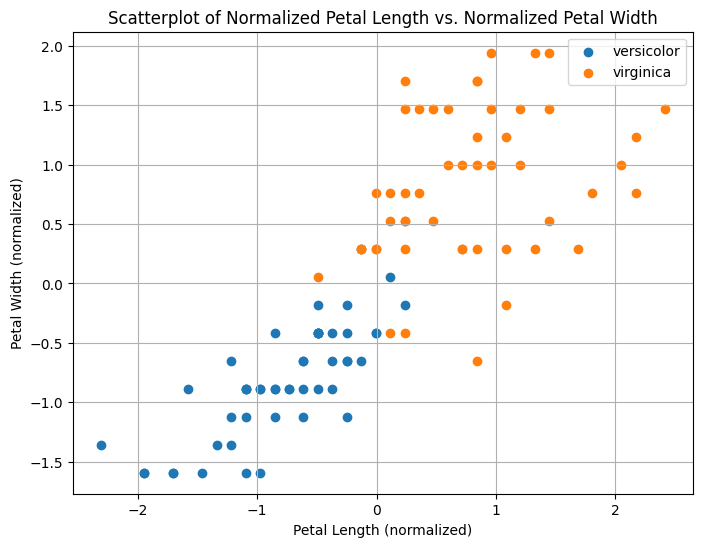

In [13]:
# make a scatterplot between the normalized petal lebgth and width.matrix
plt.figure(figsize=(8, 6))

# Get the target values for the selected data
selected_targets = iris.target[versicolor_virginica_indices]
target_names = iris.target_names[np.unique(selected_targets)]


for target_value, target_name in zip(np.unique(selected_targets), target_names):
    plt.scatter(df_petal_scaled.loc[selected_targets == target_value, 'petal length (cm)'],
                df_petal_scaled.loc[selected_targets == target_value, 'petal width (cm)'],
                label=target_name)


plt.xlabel('Petal Length (normalized)')
plt.ylabel('Petal Width (normalized)')
plt.title('Scatterplot of Normalized Petal Length vs. Normalized Petal Width')
plt.grid(True)
plt.legend()
plt.show()

## Task

Create a composite figure with a few plots in each of which you rotate the axis by an angle $\alpha$. The coordinates can be understood as:
  <br> x=r cos($\alpha$) and y=r sin($\alpha$) <br>
  So the rotation of around the center we can express as:<br>
  $$ \begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} cos(\alpha) & sin(\alpha) \\-sin(\alpha) & cos(\alpha)\end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}$$

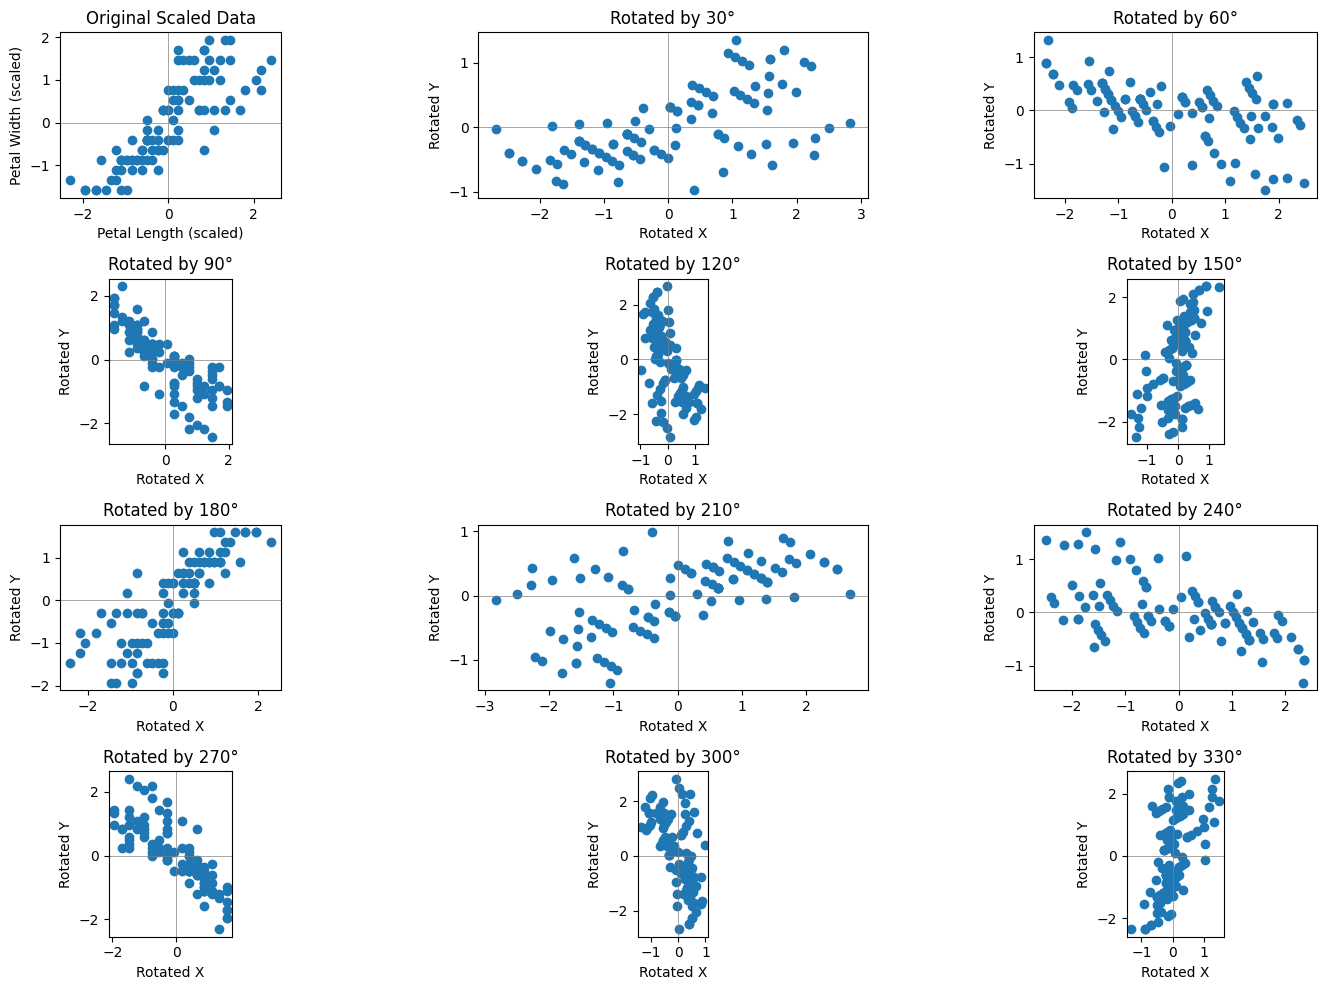

In [33]:
# Define the rotation function
def rotate(angle, df):
    theta = np.radians(angle)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])
    return df @ rotation_matrix

# Generate angles for rotation
angles = np.arange(30, 360, 30)
angles_len = len(angles)
# Create the composite figure
fig, axes = plt.subplots(round(angles_len/3), 3, figsize=(15, 10))
axes = axes.flatten()

# Plot the original scaled data
axes[0].scatter(df_petal_scaled['petal length (cm)'], df_petal_scaled['petal width (cm)'])
axes[0].set_title('Original Scaled Data')
axes[0].set_xlabel('Petal Length (scaled)')
axes[0].set_ylabel('Petal Width (scaled)')
axes[0].axhline(0, color='grey', lw=0.5)
axes[0].axvline(0, color='grey', lw=0.5)
axes[0].set_aspect('equal', adjustable='box')


# Plot rotated data for a few angles
for i, angle in enumerate(angles):
    rotated_df = rotate(angle, df_petal_scaled)
    axes[i+1].scatter(rotated_df.iloc[:, 0], rotated_df.iloc[:, 1])
    axes[i+1].set_title(f'Rotated by {angle}°')
    axes[i+1].set_xlabel('Rotated X')
    axes[i+1].set_ylabel('Rotated Y')
    axes[i+1].axhline(0, color='grey', lw=0.5)
    axes[i+1].axvline(0, color='grey', lw=0.5)
    axes[i+1].set_aspect('equal', adjustable='box')


plt.tight_layout()
plt.show()



## Task

The y-value of each point corresponds to the $z_i$ value or the value that is not explained by the vector we assume here that for the perfect vector the euclidian distance is the same as the y-value. <br> The sum of the squared values corresponds to the variance that is not explained by the vector and that is to be minimized. The x-values (after rotation) correspond to the value of the variance that is explained by the first independent vector. For an $\alpha$ from 0 to 360 plot the sum of the squared y-values against the angle. With matplotlib this can e.g. be achieved with:

```
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(alpha, r)
```

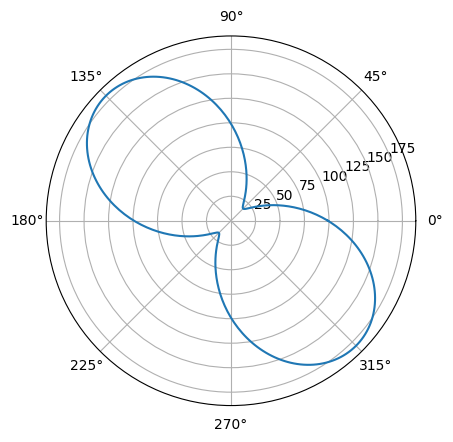

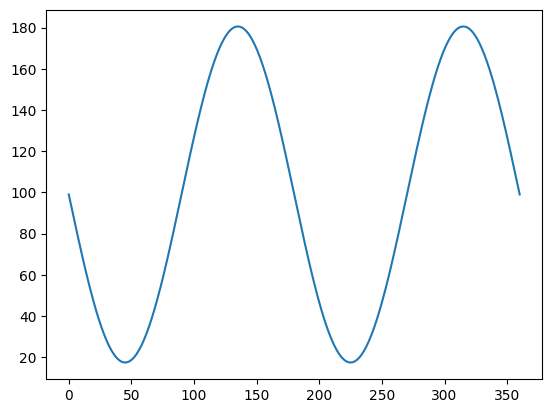

In [34]:
angles = np.linspace(0,360,360)
y_squared = []
for angle in angles:
    rotated_df = rotate(angle, df_petal_scaled)
    y_squared.append(np.sum(rotated_df.iloc[:, 1]**2))

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.radians(angles), y_squared)
plt.show()
fig1,ax1=plt.subplots()
ax1.plot(angles,y_squared)

## Task

Finally compare if the minimum values of this plot and the vector that you get back for the a new SVD are comparable.

In [35]:
U_new, S_new, Vt_new = np.linalg.svd(df_petal_scaled, full_matrices=False)
# first singular vector / (XV) the first component vector, or phi the loading
v1 = Vt_new[0]
# 2nd
#v2 = Vt_new[1,:]
angle_v1_deg = np.degrees(np.arctan2(v1[1],v1[0]))
# explained and unexplained variance by v1
explained_variance_v1 = S_new[0]**2 / np.sum(S_new**2)
unexplained_variance_v1 = 1 - explained_variance_v1

angle_v2_deg = np.degrees(np.arctan2(v2[1],v2[0]))
explained_variance_v2 = S_new[1]**2 / np.sum(S_new**2)
unexplained_variance_v2 = 1 - explained_variance_v2
print(f"SVD first vector angle: {angle_v1_deg:.2f} degrees")
print(f"SVD first vector proportion explained variance: {explained_variance_v1:.2f}")
print(f"SVD first vector proportion unexplained variance: {unexplained_variance_v1:.2f}")


SVD first vector angle: 45.00 degrees
SVD first vector proportion explained variance: 0.91
SVD first vector proportion unexplained variance: 0.09


In [36]:
min_idx = np.argmin(y_squared)
#y_squared[min_idx], np.min(y_squared)
#max_idx = np.argmax(y_squared)
total_var = np.sum(df_petal_scaled**2).sum()
min_angle_deg = angles[min_idx]

min_value_bruteforce = y_squared[min_idx] /total_var
#max_value_bruteforce = y_squared[max_idx] /total_var
print("Brute-force minimum at {:.4f}°  (unexplained var = {:.6f})"
      .format(min_angle_deg, min_value_bruteforce))
#print("Brute-force maximum at {:.4f}°  (unexplained var = {:.6f})"
#      .format(max_angle_deg, max_value_bruteforce))

Brute-force minimum at 45.1253°  (unexplained var = 0.088330)


In [32]:
angle_diff = min(abs(angle_v1_deg - min_angle_deg), 180 - abs(angle_v1_deg - min_angle_deg))
print("Angle difference (considering 180° symmetry) = {:.6f}°".format(angle_diff))
print("Brute min unexplained = {:.6f}, SVD unexplained = {:.6f}, diff = {:.6g}"
      .format(min_value_bruteforce, unexplained_variance_v1, min_value_bruteforce - unexplained_variance_v1))


Angle difference (considering 180° symmetry) = -89.874652°
Brute min unexplained = 0.088330, SVD unexplained = 0.088326, diff = 3.9407e-06


The minimum point of the polar curve where y_square (the unexplained variance) is minimum is the direction that explains the most variance,ie. the same definition as the first principal component from SVD.

And they are comparable.

# Limitations of SVD/PCA
It is a fair assumption to consider PCA a non normallized version of SVD (check the math) however there are other that this part of the lab shall reveal. SVD is often used to look at measured (discrete) data and extract the normalized vectors from it. Here we shall first construct known data and then try to retrieve the data in it. We use for this we construct a sequence of non overlapping spectra of different species and look at the progression of the kinetic:<be>
WE excite the ground state of the same (excitation is before the space of observation) and then see the components A, B, C decay back into the ground state<br>
GS -> A-> B-> C -> GS

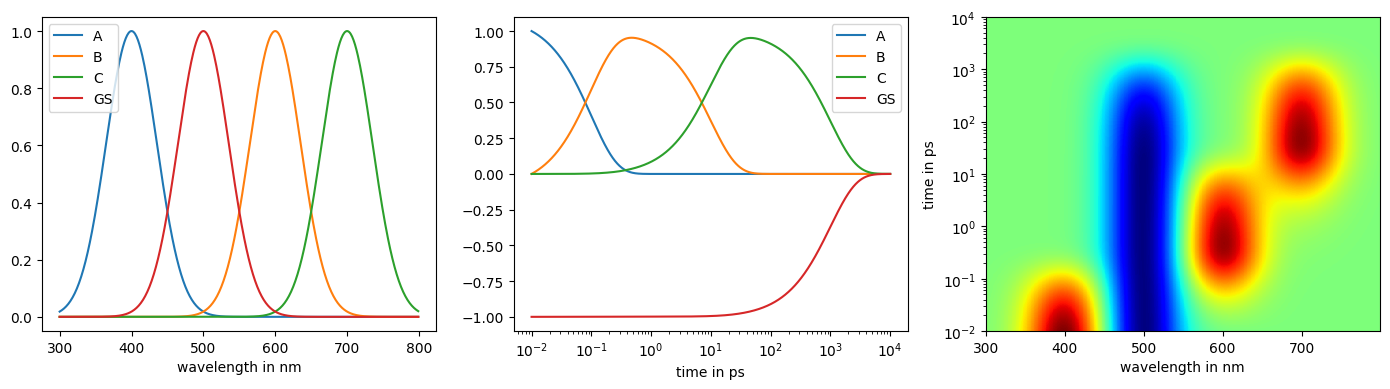

In [19]:
gauss = lambda x,mu,sigma=50: np.exp(-((x-mu)/sigma)**2)
x=np.arange(300,800,1)
spectra=pd.DataFrame({'A':gauss(x=x,mu=400),'B':gauss(x=x,mu=600),'C':gauss(x=x,mu=700),'GS':gauss(x=x,mu=500)},index=x)
spectra.index.name='wavelength in nm'
time=np.logspace(-2,4,int(1e4))
c=np.zeros((len(time),3))
rates=[1/0.1,1/10,1/1000]
c[0,0]=1
for i,t in enumerate(time[1:]):
    dc=c[i,:]
    timestep=t-time[i]
    dc[0]+=-rates[0]*timestep*dc[0]
    dc[1]+=rates[0]*timestep*dc[0]-rates[1]*timestep*dc[1]
    dc[2]+=rates[1]*timestep*dc[1]-rates[2]*timestep*dc[2]
    dc[dc<0]=0
    c[i+1,:]=dc
c=pd.DataFrame(c,index=time,columns=['A','B','C'])
c['GS']=-1*c.sum(axis=1)
c.index.name='time in ps'
data=0
for i,col in enumerate(c.columns):
    A,B=np.meshgrid(c.loc[:,col].values,spectra.loc[:,col].values)
    C=pd.DataFrame((A*B).T,index=c.index)
    if i==0: data=C
    else: data=data+C
data.columns=spectra.index.values

fig,ax=plt.subplots(1,3,figsize=(14,4))
spectra.plot(ax=ax[0])
c.plot(ax=ax[1])
ax[1].set_xscale('log')
X, Y = np.meshgrid(data.columns.values.astype(float), data.index.values.astype(float))
ax[2].pcolormesh(X,Y,data.values,cmap='jet')
ax[2].set_yscale('log')
ax[2].set_xlabel(spectra.index.name)
ax[2].set_ylabel(c.index.name)
fig.tight_layout()

## Task
Use SVD on the DataFrame "data" just generated, plot the plot the spectra, the kinetics and the strength of the first 5 singular vectors in this data. why are they different? Any idea how you would fix that?<br>Hint: Check that you have the right orientation of the matrics by comparing the dimensions to the DataFrame

In [20]:
data.head()

300       301       302       303       304       305  \
time in ps                                                               
0.010000    0.018313  0.019830  0.021456  0.023197  0.025058  0.027048   
0.010014    0.018310  0.019828  0.021453  0.023193  0.025055  0.027044   
0.010028    0.018308  0.019825  0.021450  0.023190  0.025051  0.027040   
0.010042    0.018305  0.019822  0.021447  0.023187  0.025048  0.027037   
0.010055    0.018303  0.019819  0.021444  0.023184  0.025044  0.027033   

                 306       307       308       309  ...           790  \
time in ps                                          ...                 
0.010000    0.029172  0.031438  0.033852  0.036423  ...  8.151866e-11   
0.010014    0.029168  0.031433  0.033848  0.036418  ...  1.706477e-10   
0.010028    0.029164  0.031429  0.033843  0.036413  ...  2.674150e-10   
0.010042    0.029160  0.031425  0.033838  0.036408  ...  3.718507e-10   
0.010055    0.029156  0.031420  0.033833  0.036403  ...  4.839852e-10   

                     791           792           793           794  \
time in ps                                                           
0.010000    7.053108e-11  6.101040e-11  5.276468e-11  4.562637e-11   
0.010014    1.481341e-10  1.285877e-10  1.116228e-10  9.690269e-11   
0.010028    2.328353e-10  2.027564e-10  1.765974e-10  1.538505e-10   
0.010042    3.246628e-10  2.835428e-10  2.477127e-10  2.164923e-10   
0.010055    4.236448e-10  3.709731e-10  3.249932e-10  2.848508e-10   

                     795           796           797           798  \
time in ps                                                           
0.010000    3.944929e-11  3.410606e-11  2.948574e-11  2.549179e-11   
0.010014    8.413347e-11  7.305883e-11  6.345543e-11  5.512879e-11   
0.010028    1.340726e-10  1.168770e-10  1.019264e-10  8.892714e-11   
0.010042    1.892876e-10  1.655799e-10  1.449167e-10  1.269034e-10   
0.010055    2.497995e-10  2.191871e-10  1.924442e-10  1.690743e-10   

                     799  
time in ps                
0.010000    2.204024e-11  
0.010014    4.790965e-11  
0.010028    7.762319e-11  
0.010042    1.111962e-10  
0.010055    1.486440e-10  

[5 rows x 500 columns]

In [21]:
X_data = data.values
U_data, S_data, Vt_data = np.linalg.svd(X_data, full_matrices=False)
X_data.shape, U_data.shape, S_data.shape, Vt_data.shape
# U is time, V is spectra

((10000, 500), (10000, 500), (500,), (500, 500))

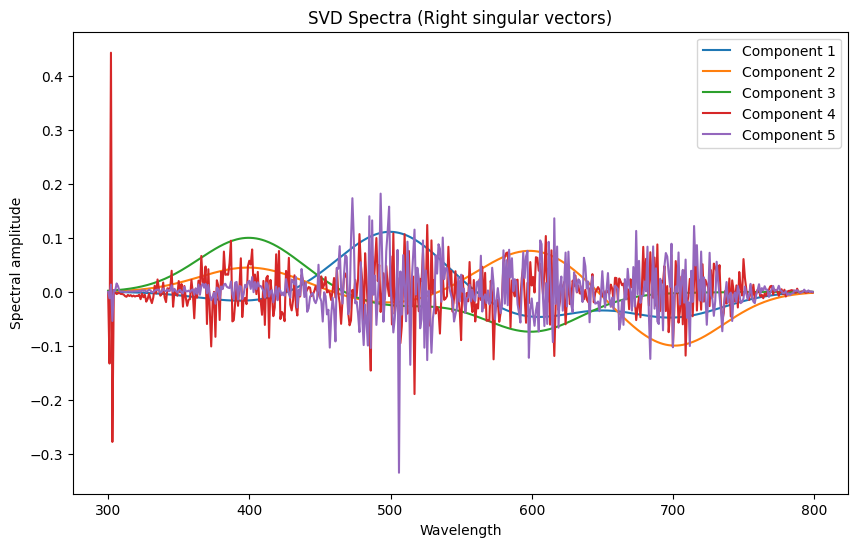

In [22]:
# plot spectra, columns
plt.figure(figsize=(10,6))
for i in range(5):
    plt.plot(data.columns, Vt_data[i, :], label=f'Component {i+1}')
plt.xlabel('Wavelength')
plt.ylabel('Spectral amplitude')
plt.title('SVD Spectra (Right singular vectors)')
plt.legend()
plt.show()


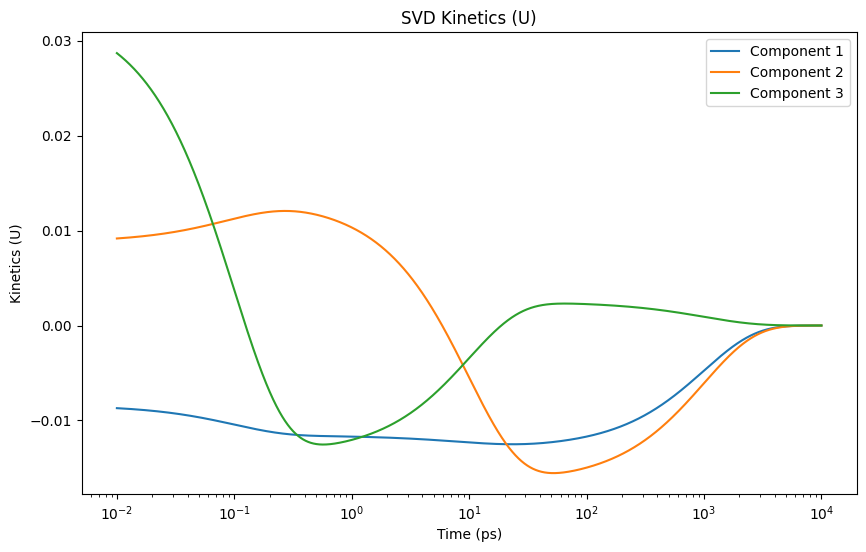

In [23]:
# plot the kinetics
plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(data.index, U_data[:,i], label=f'Component {i+1}')
plt.xlabel('Time (ps)')
plt.ylabel('Kinetics (U)')
plt.title('SVD Kinetics (U)')
plt.xscale('log')
plt.legend()
plt.show()

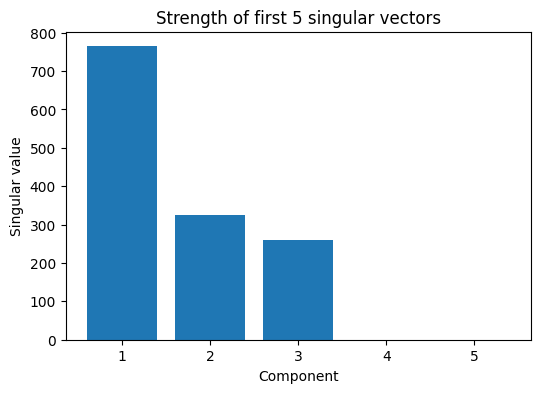

In [24]:
# Strength (S)
plt.figure(figsize=(6,4))
plt.bar(range(1,6), S_data[:5])
plt.xlabel('Component')
plt.ylabel('Singular value')
plt.title('Strength of first 5 singular vectors')
plt.show()

### Why spectra and kinetics “look different?
Fix:
SVD gives normalized vectors. Need to scale by S to get the orginal amplitude


##

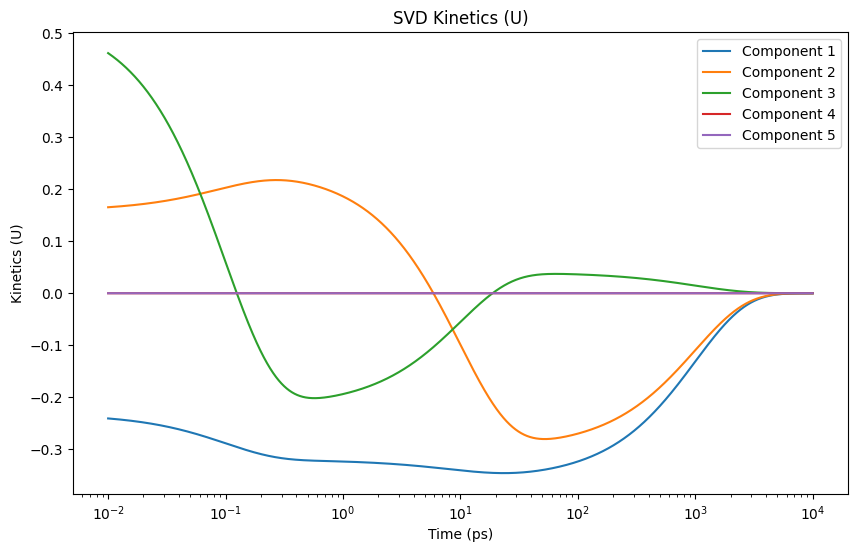

In [25]:
# plot the kinetics
plt.figure(figsize=(10,6))
scaled_kinetics = U_data * S_data
for i in range(5):
    plt.plot(data.index, U_data[:, i] * np.sqrt(S_data[i]), label=f'Component {i+1}')
plt.xlabel('Time (ps)')
plt.ylabel('Kinetics (U)')
plt.title('SVD Kinetics (U)')
plt.xscale('log')
plt.legend()
plt.show()


### Discussion

Orthogonality constraint
- Real spectra A, B, C are not orthogonal.
- Real kinetic are not orthogonal
- SVD forces orthogonal vectors, so each singular vector is a linear combination of true spectra/kinetics.

Overlaping contributions or correlation between components can make singular vector mix multiple species. The first few singlar vectors are combinations that capture the largest variance, not necessarily individual groups.

# Clustering

In this lab we will look into both K-mean clustering and hierachical clustering. <br>
please use the **df_iris** from above for these plots.

## K-Mean clustering

Use the below code to create a plot with 5 rows and 5 columns. Now use sklearn.cluster.KMeans to calculate a new "selector" that is separating the different flower types. for row 2-5 change the number of clusters you calculate from [1,2,3,4,5] and the numbers of initial random states you test [1,2,5,20]. Closely investigate the plots and formulate briefely where and when they differ.

Now use the same code but only give it two of the 4 columns (e.g. the first two) and observe the difference. Can you formulate it?
    


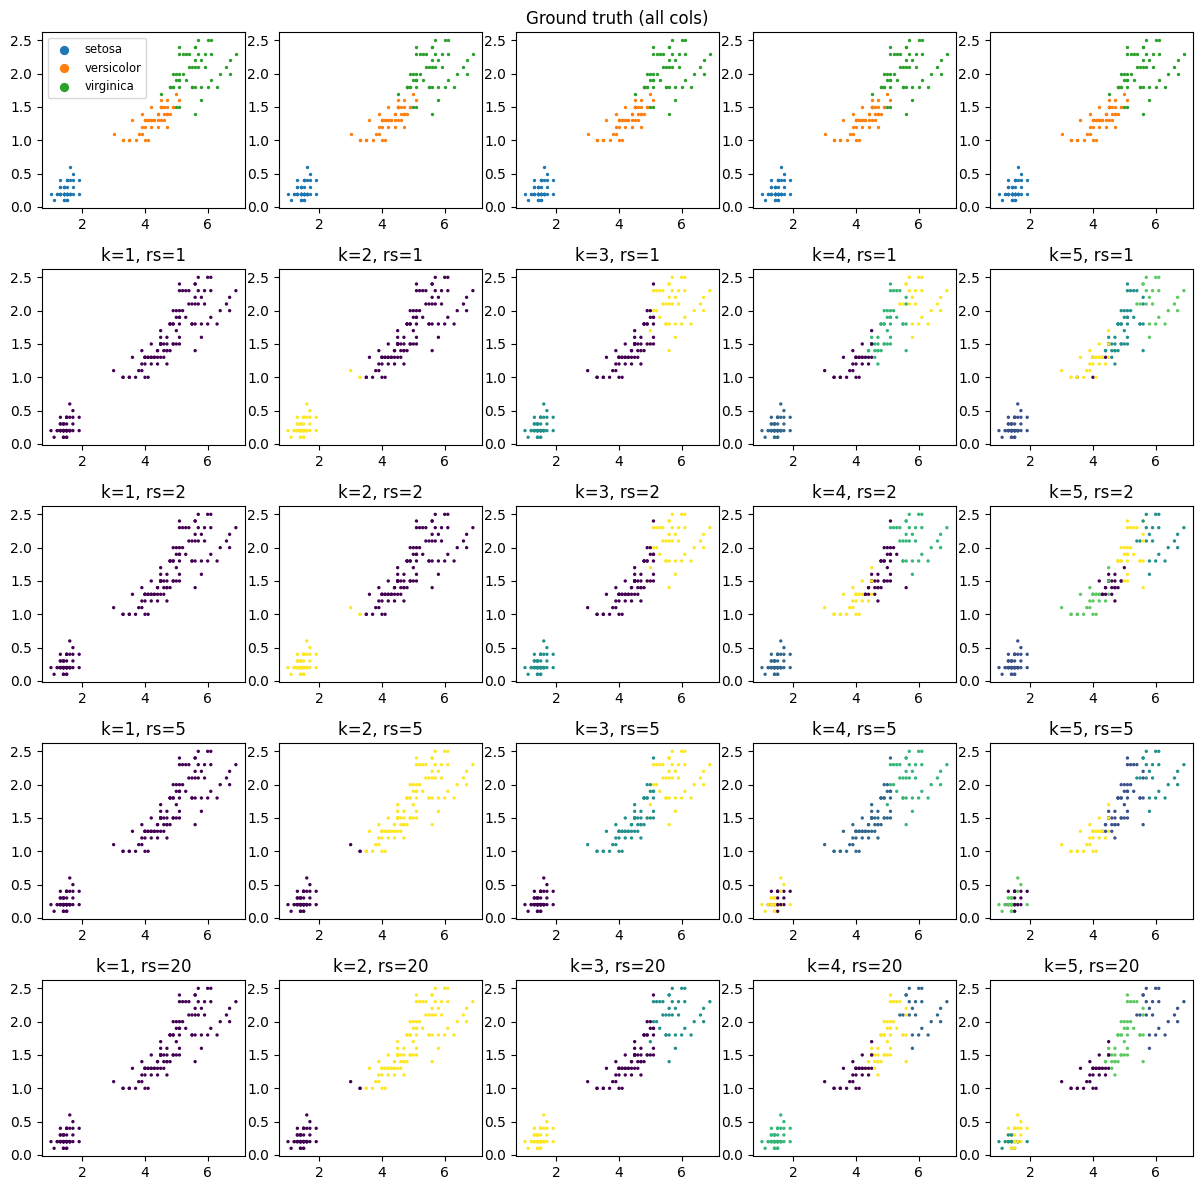

In [26]:
np.random.seed(12345)  # we start with the same random number to reproducible data
fig,ax=plt.subplots(5,5,figsize=(12,12))
#plot the selection as given in the data
selector_given=iris['target']
for i in np.unique(selector_given):
    selector_name=iris['target_names'][i]
    for j in range(5):
        ax[0,j].scatter(df_iris.iloc[selector_given==i,2],df_iris.iloc[selector_given==i,3],label=selector_name,s=2)
ax[0, 0].legend(markerscale=4, fontsize="small")
ax[0, 2].set_title("Ground truth (all cols)")
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
n_clusters_list = [1, 2, 3, 4, 5]
random_states = [1, 2, 5, 20]
X = df_iris.values
x0 = df_iris.iloc[:, 2]         # petal length (for plotting)
x1 = df_iris.iloc[:, 3]

for i, rs in enumerate(random_states):   # row index
    for j, n_clusters in enumerate(n_clusters_list):  # col index
        kmeans = KMeans(n_clusters=n_clusters, random_state=rs, n_init="auto")
        y_pred = kmeans.fit_predict(X)

        # scatter plot: color by cluster
        ax[i+1, j].scatter(x0, x1, c=y_pred, s=2)
        ax[i+1, j].set_title(f"k={n_clusters}, rs={rs}")



plt.tight_layout()
plt.show()


### Observations: Closely investigate the plots and formulate briefely where and when they differ.

- Column 1 (k=1): One cluster so everything is forced into one cluster, so there's no distinction at all for all random state tested.

- Column 2 (k=2): Two clusters. One cluster clearly picks out setosa, the other merges versicolor and virginica. This is stable across all random state,.

- Column 3 (k=3): This separate the different flower types best, three clusters emerge. Setosa is always easiest to pick out.

- Column 4: One species (usually Virginica) gets split into two clusters. Which subgroup gets split depends on the random state.

- Column 5: All species get subdivided arbitrarily. Different random states yiels very different parititions, highly unstable.


# Choosing the right Clustering method

try to separate the domains in all the images in the subfolder "Smileys" using the clustering methods:

Kmean and spectral clustering from sklearn.cluster


The domain image is from:
Gorchy - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=4459327

Hint, for real images separating the clusters using an edge detection methoids can sometimes help. Here is a simple method for edge detection using the convolution with a simple Kernel.

/tmp/ipython-input-3077346402.py:2: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc,ndimage  # a library with useful stuff


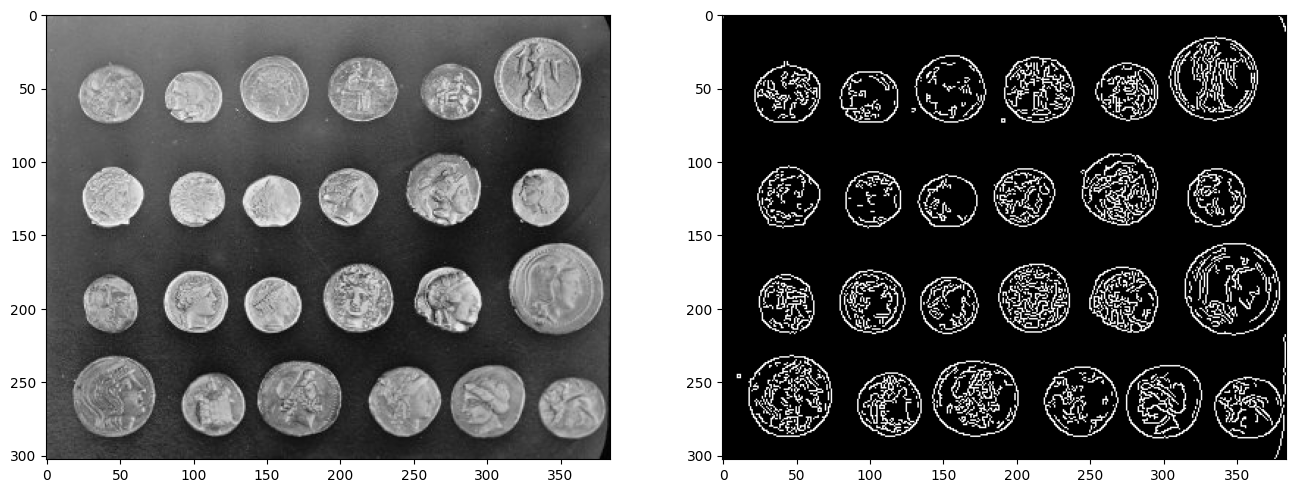

In [27]:
import numpy as np
from scipy import misc,ndimage  # a library with useful stuff
import skimage,cv2

coins = skimage.data.coins()
edges = cv2.Canny(coins, 100, 200)
fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(coins, cmap='gray')
ax[1].imshow(edges, cmap='gray')

bl_1_o.png


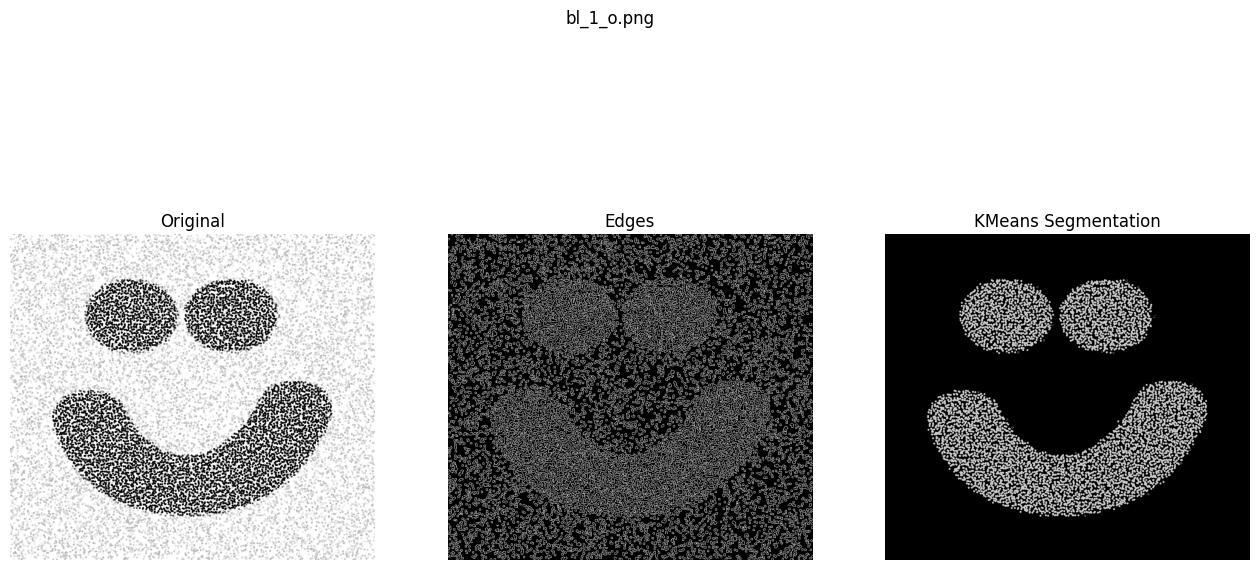

bl_3_o.png


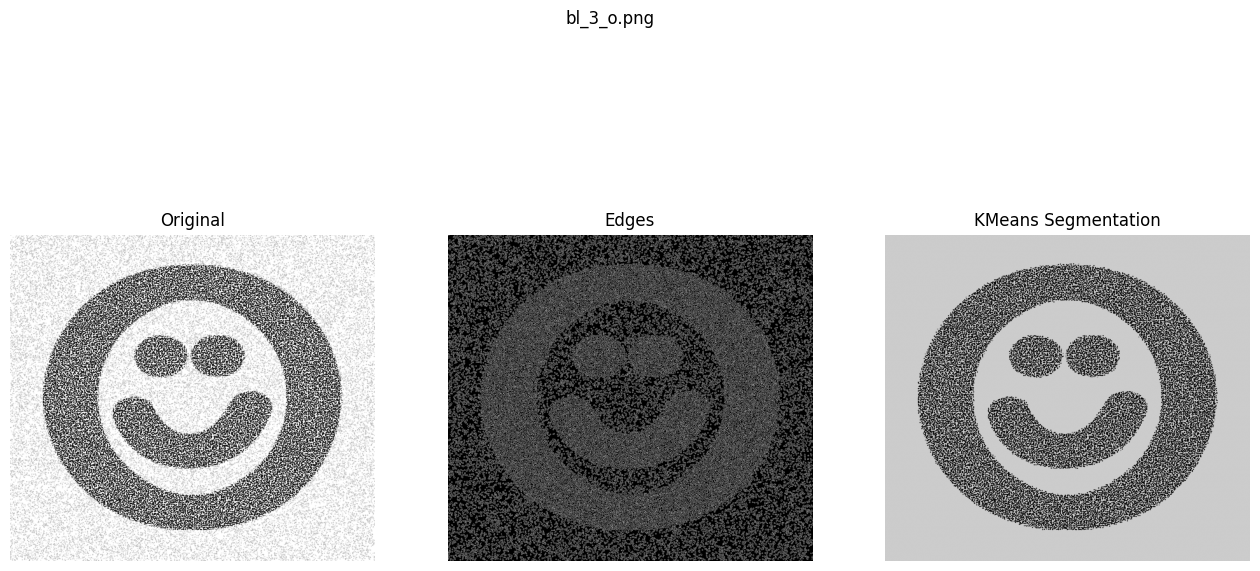

cl_2_o.png


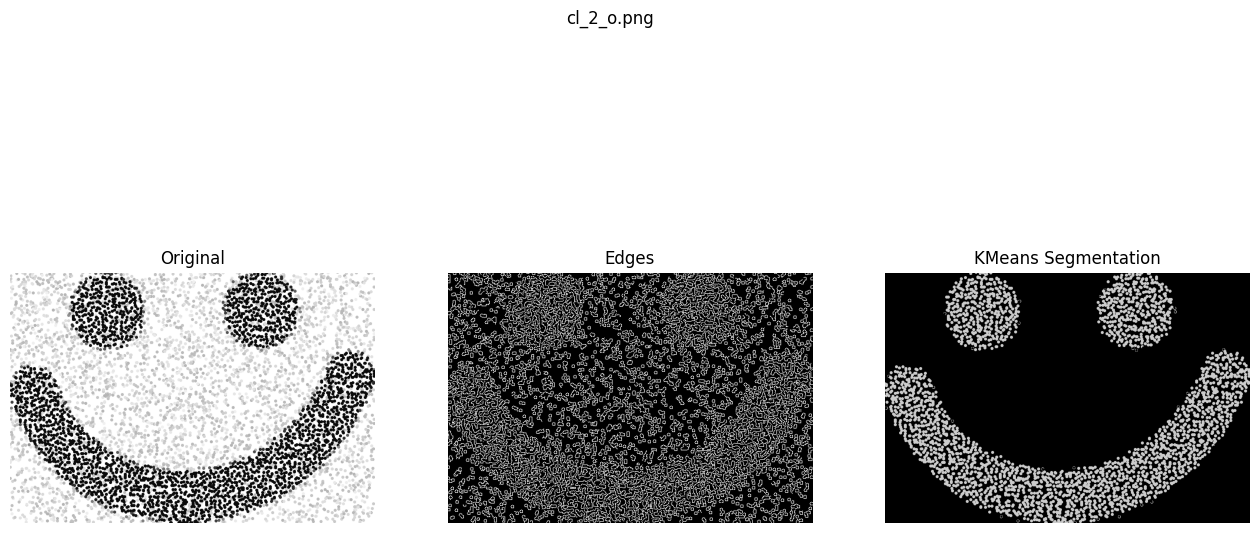

cl_3_o.png


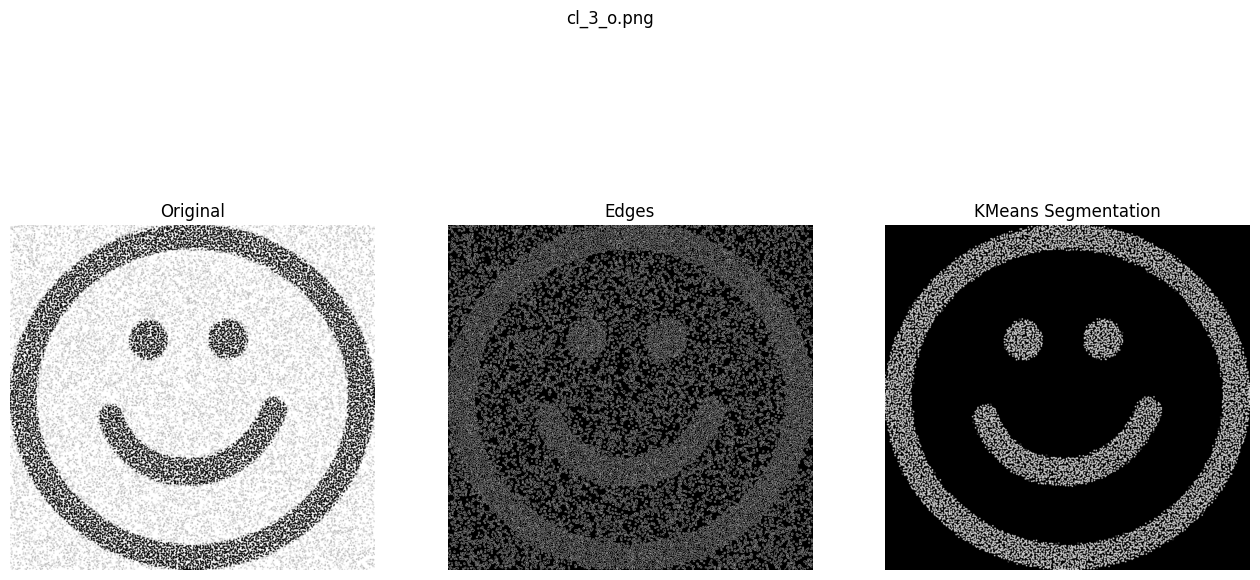

cl_1_o.png


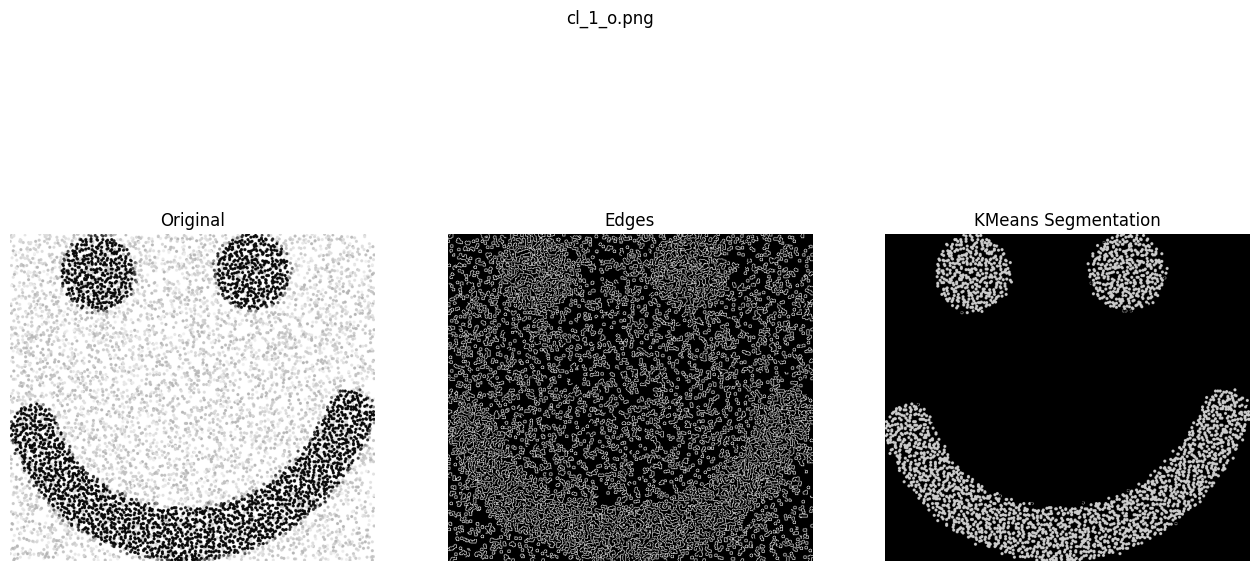

NdFeB-Domains.jpg


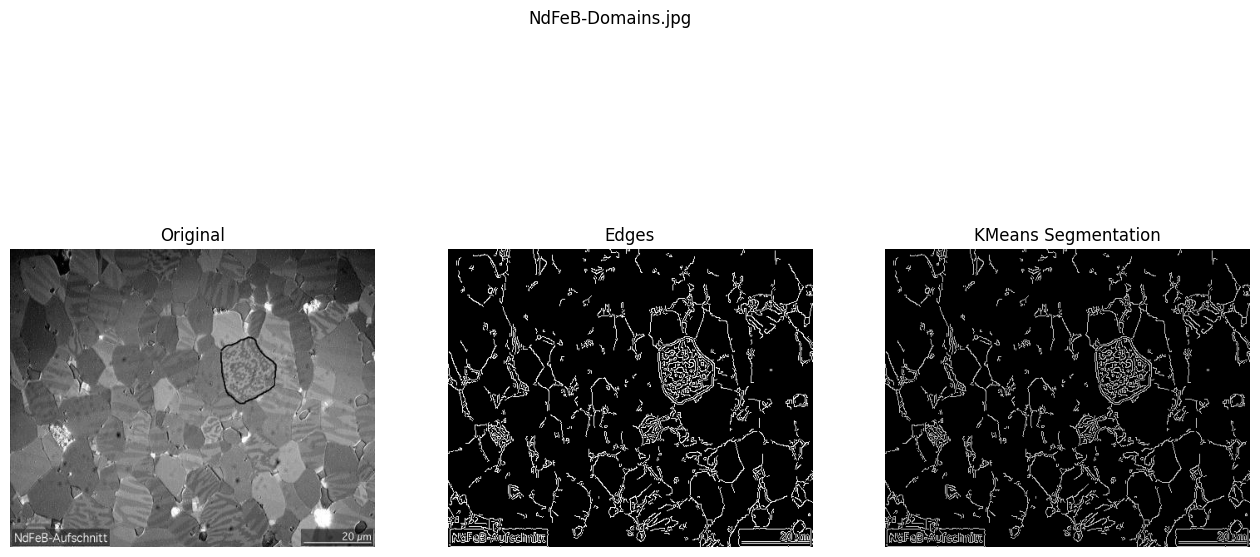

bl_4_o.png


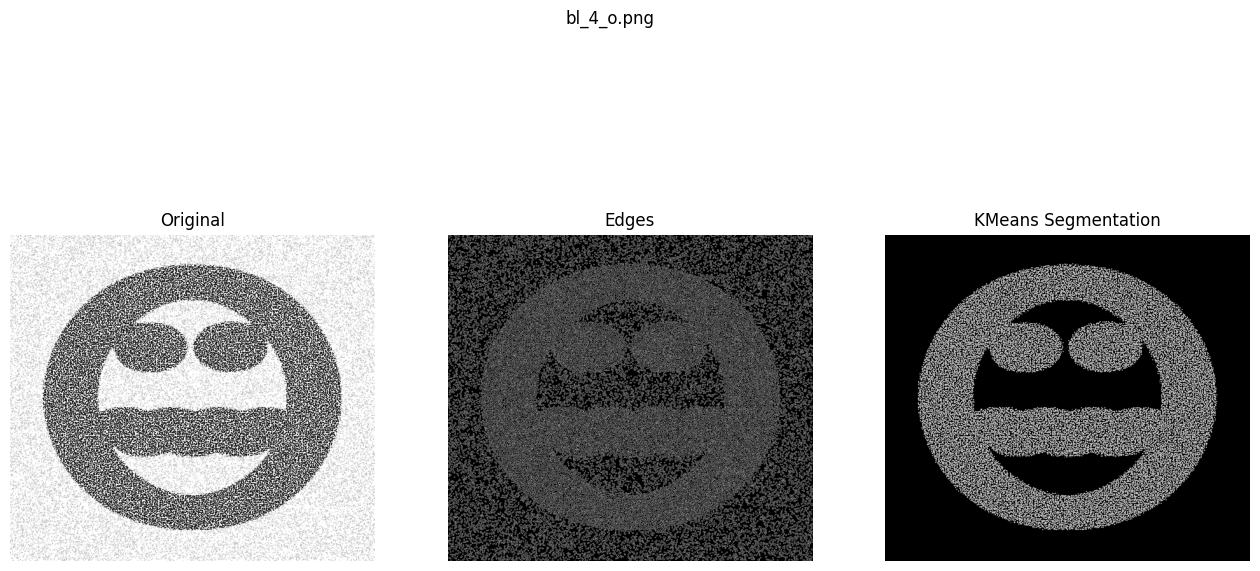

bl_2_o.png


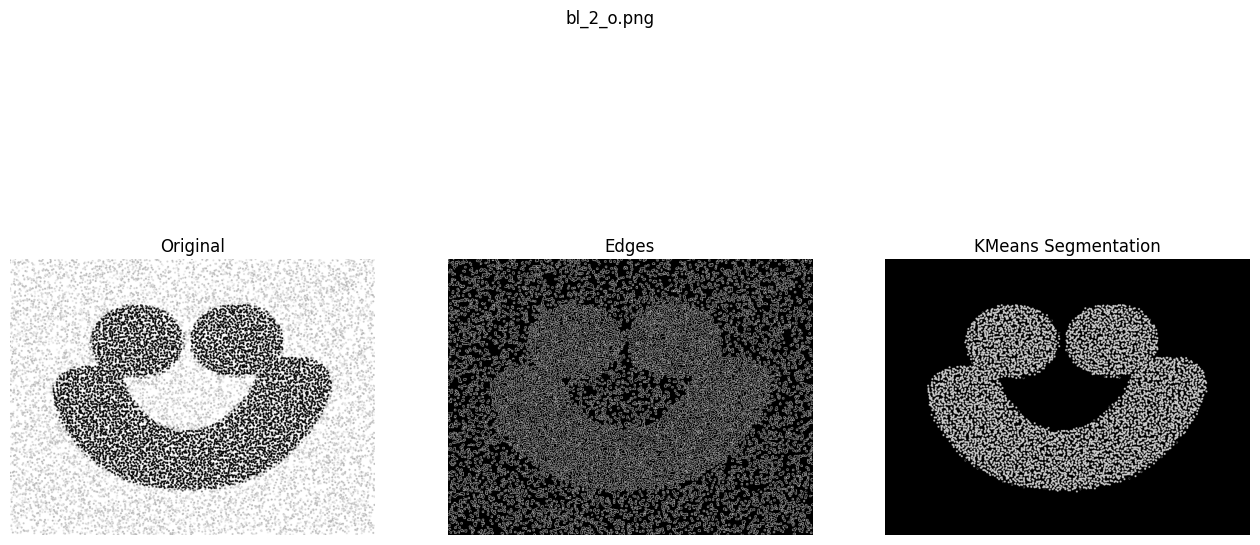

cl_4_o.png


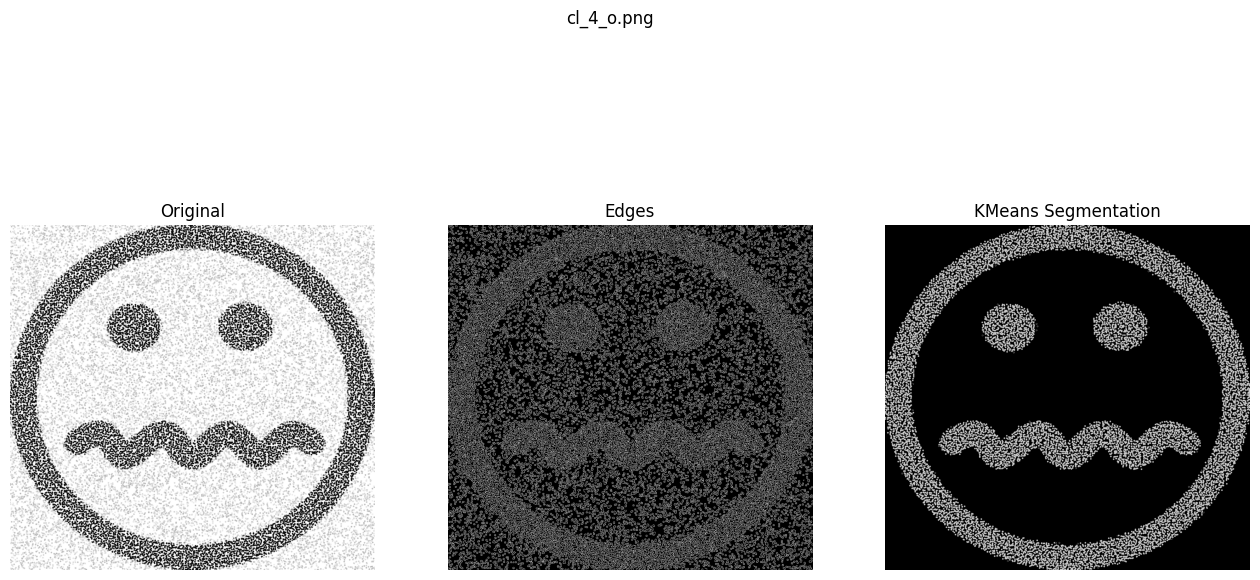

In [38]:
import os
import cv2
from skimage import io, color
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
import matplotlib.pyplot as plt

folder = "/content/drive/MyDrive/Smileys"
images = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if not images:
  raise ValueError("No images found in the folder!")

for img_name in images:
  print(img_name)
  img_path = os.path.join(folder, img_name)
  img = io.imread(img_path)
  #print(img.shape)

  if img.shape[2] == 4:
    img = img[:, :, :3] # remove the transparency for clusterings purpose

  #print(img.shape)
  img_gray = color.rgb2gray(img) #returns float 0-1
  #print(img_gray)
  edges = cv2.Canny((img_gray*255).astype("uint8"), 100, 200)
  #edges = cv2.Canny(img, 100, 200)

  X_color = img.reshape(-1, 3)
  X_edges = edges.reshape(-1, 1)   # edge strength as extra feature
  X = np.hstack((X_color, X_edges))  # combine RGB + edges
  kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X)
  labels_kmeans = kmeans.labels_.reshape(img.shape[:2])

  plt.figure(figsize=(16, 8))

  plt.subplot(1, 3, 1)
  plt.imshow(img)
  plt.title("Original")
  plt.axis("off")

  plt.subplot(1, 3, 2)
  plt.imshow(edges, cmap="gray")
  plt.title("Edges")
  plt.axis("off")

  plt.subplot(1, 3, 3)
  plt.imshow(labels_kmeans, cmap="nipy_spectral")
  plt.title("KMeans Segmentation")
  plt.axis("off")


  plt.suptitle(img_name)
  plt.show()


In [39]:
if 0:
  import os
  import cv2
  from skimage import io, color
  import numpy as np
  from sklearn.cluster import KMeans, SpectralClustering
  import matplotlib.pyplot as plt

  folder = "/content/drive/MyDrive/Smileys"
  images = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
  if not images:
    raise ValueError("No images found in the folder!")

  for img_name in images:
    print(img_name)
    img_path = os.path.join(folder, img_name)
    img = io.imread(img_path)
    #print(img.shape)

    if img.shape[2] == 4:
      img = img[:, :, :3] # remove the transparency for clusterings purpose
    img_gray = color.rgb2gray(img) #returns float 0-1
    #print(img_gray)
    edges = cv2.Canny((img_gray*255).astype("uint8"), 100, 200)
    max_samples = 5000
    scale = 0.05 if max(img.shape[:2]) > 200 else 1
    small_img = cv2.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale)))
    small_edges = cv2.resize(edges, (small_img.shape[1], small_img.shape[0]))
    X_small = np.hstack((small_img.reshape(-1, 3), small_edges.reshape(-1, 1)))
    if X_small.shape[0] > max_samples:
      idx = np.random.choice(X_small.shape[0], max_samples, replace=False)
      X_small = X_small[idx]
    print(X_small.shape[0])
    print("Starting spectral")
    spectral = SpectralClustering(
        n_clusters=2,
        affinity='nearest_neighbors',
        n_neighbors=5,
        random_state=42,
        assign_labels='kmeans'
    ).fit(X_small)
    print("Done spectral")
    labels_spectral = spectral.labels_.reshape(small_img.shape[:2])

    # Resize spectral labels back to original size
    labels_spectral_full = cv2.resize(labels_spectral.astype("float"), (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

    plt.figure(figsize=(16, 8))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap="gray")
    plt.title("Edges")
    plt.axis("off")


    plt.subplot(1, 3, 3)
    plt.imshow(labels_spectral_full, cmap="nipy_spectral")
    plt.title("Spectral Segmentation")
    plt.axis("off")

    plt.suptitle(img_name)
    plt.show()

## Discussion

KMeans is computationally light, scaling linearly with the number of pixels, making it pratical for image segmentation on a personal computer. In contrast, spectral clustering requires building a similarity graph and performing eigen-decomposition, which scales quadratically to cubically with the number of samples. Even when subsampling to 5000 pixels, my computer struggles to run spectral clustering in reasonable time, making it impratical for large or multiple images.